<a href="https://colab.research.google.com/github/azizpambayun/project/blob/main/covid_19_analysis_and_visualization_in_Indonesia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
!git clone 'https://github.com/azizpambayun/datasets'

Cloning into 'datasets'...
remote: Enumerating objects: 17, done.
remote: Counting objects: 100% (17/17), done.
remote: Compressing objects: 100% (15/15), done.
remote: Total 17 (delta 3), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (17/17), done.


In [4]:
!head datasets/covid_19_indonesia_time_series_all.csv

﻿Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,Location Level,City or Regency,Province,Country,Continent,Island,Time Zone,Special Status,Total Regencies,Total Cities,Total Districts,Total Urban Villages,Total Rural Villages,Area (km2),Population,Population Density,Longitude,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
3/1/2020,ID-JK,DKI Jakarta,2,0,0,2,39,20,41,-22,Province,,DKI Jakarta,Indonesia,Asia,Jawa,UTC+07:00,Daerah Khusus Ibu Kota,1,5,44,267,,664,10846145,16334.31,106.8361183,-6.204698991,0.18,3.60,0.00,1.84,0.18,51.28%,105.13%,,
3/2/2020,ID-JK,DKI Jakarta,2,0,0,2,41,20,41,-20,Province,,DKI Jakarta,Indonesia,Asia,Jawa,UTC+07:00,Daerah Khusus Ibu Kota,1,5,44,267,,664,10846145,16334.31,106.8361183,-6.204698991,0

In [5]:
content = '''Date
Location_ISO_Code
Location
New_Cases
New_Deaths
New_Recovered
New_Active_Cases
Total_Cases
Total_Deaths
Total_Recovered
Total_Active_Cases
Location_Level
City_or_Regency
Province
Country
Continent
Island
Time_Zone
Special_Status
Total_Regencies
Total_Cities
Total_Districts
Total_Urban_Villages
Total_Rural_Villages
Area_(km2)
Population
Population_Density
Longitude
Latitude
New_Cases_per_Million
Total_Cases_per_Million
New_Deaths_per_Million
Total_Deaths_per_Million
Case_Fatality_Rate
Case_Recovered_Rate
Growth_Factor_of_New_Cases
Growth_Factor_of_New_Deaths'''

columns_list = content.split('\n')
#for i in range(len(columns_list)):
  #columns_list[i] = columns_list[i].strip()

In [6]:
covid = pd.read_csv('datasets/covid_19_indonesia_time_series_all.csv', header=0, names=columns_list, index_col=False)
covid = covid.set_index('Location')
covid.head()

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  return func(*args, **kwargs)


,Date,Location_ISO_Code,New_Cases,New_Deaths,New_Recovered,New_Active_Cases,Total_Cases,Total_Deaths,Total_Recovered,Total_Active_Cases,Location_Level,City_or_Regency,Province,Country,Continent,Island,Time_Zone,Special_Status,Total_Regencies,Total_Cities,Total_Districts,Total_Urban_Villages,Total_Rural_Villages,Area_(km2),Population,Population_Density,Longitude,Latitude,New_Cases_per_Million,Total_Cases_per_Million,New_Deaths_per_Million,Total_Deaths_per_Million,Case_Fatality_Rate,Case_Recovered_Rate,Growth_Factor_of_New_Cases,Growth_Factor_of_New_Deaths
Location,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
DKI Jakarta,3/1/2020,ID-JK,2,0,0,2,39,20,41,-22,Province,NaN,DKI Jakarta,Indonesia,Asia,Jawa,UTC+07:00,Daerah Khusus Ibu Kota,1,5.0,44,267.0,NaN,664,10846145,16334.31,106.836118,-6.204699,0.18,3.60,0.0,1.84,0.18,51.28%,105.13%,NaN
DKI Jakarta,3/2/2020,ID-JK,2,0,0,2,41,20,41,-20,Province,NaN,DKI Jakarta,Indonesia,Asia,Jawa,UTC+07:00,Daerah Khusus Ibu Kota,1,5.0,44,267.0,NaN,664,10846145,16334.31,106.836118,-6.204699,0.18,3.78,0.0,1.84,0.18,48.78%,100.00%,1.0
Indonesia,3/2/2020,IDN,2,0,0,2,2,0,0,2,Country,NaN,NaN,Indonesia,Asia,NaN,NaN,NaN,416,98.0,7230,8488.0,74953.0,1916907,265185520,138.34,113.921327,-0.789275,0.01,0.01,0.0,0.00,0.00,0.00%,0.00%,NaN
Riau,3/2/2020,ID-RI,1,0,0,1,2,0,3,-1,Province,NaN,Riau,Indonesia,Asia,Sumatera,UTC+07:00,NaN,10,2.0,169,268.0,1591.0,87024,6074100,69.80,101.805109,0.511648,0.16,0.33,0.0,0.00,0.00,0.00%,150.00%,NaN
DKI Jakarta,3/3/2020,ID-JK,2,0,0,2,43,20,41,-18,Province,NaN,DKI Jakarta,Indonesia,Asia,Jawa,UTC+07:00,Daerah Khusus Ibu Kota,1,5.0,44,267.0,NaN,664,10846145,16334.31,106.836118,-6.204699,0.18,3.96,0.0,1.84,0.18,46.51%,95.35%,1.0


In [7]:
covid.info()
covid[0:7]

<class 'pandas.core.frame.DataFrame'>
Index: 21759 entries, DKI Jakarta to Indonesia
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Date                         21759 non-null  object 
 1   Location_ISO_Code            21759 non-null  object 
 2   New_Cases                    21759 non-null  int64  
 3   New_Deaths                   21759 non-null  int64  
 4   New_Recovered                21759 non-null  int64  
 5   New_Active_Cases             21759 non-null  int64  
 6   Total_Cases                  21759 non-null  int64  
 7   Total_Deaths                 21759 non-null  int64  
 8   Total_Recovered              21759 non-null  int64  
 9   Total_Active_Cases           21759 non-null  int64  
 10  Location_Level               21759 non-null  object 
 11  City_or_Regency              0 non-null      float64
 12  Province                     21117 non-null  object 
 13  Country

,Date,Location_ISO_Code,New_Cases,New_Deaths,New_Recovered,New_Active_Cases,Total_Cases,Total_Deaths,Total_Recovered,Total_Active_Cases,Location_Level,City_or_Regency,Province,Country,Continent,Island,Time_Zone,Special_Status,Total_Regencies,Total_Cities,Total_Districts,Total_Urban_Villages,Total_Rural_Villages,Area_(km2),Population,Population_Density,Longitude,Latitude,New_Cases_per_Million,Total_Cases_per_Million,New_Deaths_per_Million,Total_Deaths_per_Million,Case_Fatality_Rate,Case_Recovered_Rate,Growth_Factor_of_New_Cases,Growth_Factor_of_New_Deaths
Location,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
DKI Jakarta,3/1/2020,ID-JK,2,0,0,2,39,20,41,-22,Province,NaN,DKI Jakarta,Indonesia,Asia,Jawa,UTC+07:00,Daerah Khusus Ibu Kota,1,5.0,44,267.0,NaN,664,10846145,16334.31,106.836118,-6.204699,0.18,3.60,0.00,1.84,0.18,51.28%,105.13%,NaN
DKI Jakarta,3/2/2020,ID-JK,2,0,0,2,41,20,41,-20,Province,NaN,DKI Jakarta,Indonesia,Asia,Jawa,UTC+07:00,Daerah Khusus Ibu Kota,1,5.0,44,267.0,NaN,664,10846145,16334.31,106.836118,-6.204699,0.18,3.78,0.00,1.84,0.18,48.78%,100.00%,1.0
Indonesia,3/2/2020,IDN,2,0,0,2,2,0,0,2,Country,NaN,NaN,Indonesia,Asia,NaN,NaN,NaN,416,98.0,7230,8488.0,74953.0,1916907,265185520,138.34,113.921327,-0.789275,0.01,0.01,0.00,0.00,0.00,0.00%,0.00%,NaN
Riau,3/2/2020,ID-RI,1,0,0,1,2,0,3,-1,Province,NaN,Riau,Indonesia,Asia,Sumatera,UTC+07:00,NaN,10,2.0,169,268.0,1591.0,87024,6074100,69.80,101.805109,0.511648,0.16,0.33,0.00,0.00,0.00,0.00%,150.00%,NaN
DKI Jakarta,3/3/2020,ID-JK,2,0,0,2,43,20,41,-18,Province,NaN,DKI Jakarta,Indonesia,Asia,Jawa,UTC+07:00,Daerah Khusus Ibu Kota,1,5.0,44,267.0,NaN,664,10846145,16334.31,106.836118,-6.204699,0.18,3.96,0.00,1.84,0.18,46.51%,95.35%,1.0
Indonesia,3/3/2020,IDN,0,0,0,0,2,0,0,2,Country,NaN,NaN,Indonesia,Asia,NaN,NaN,NaN,416,98.0,7230,8488.0,74953.0,1916907,265185520,138.34,113.921327,-0.789275,0.00,0.01,0.00,0.00,0.00,0.00%,0.00%,0.0
Jawa Barat,3/3/2020,ID-JB,1,1,0,0,1,1,8,-8,Province,NaN,Jawa Barat,Indonesia,Asia,Jawa,UTC+07:00,NaN,18,9.0,627,645.0,5312.0,35378,45161325,1276.55,107.603708,-6.920432,0.02,0.02,0.02,0.02,0.00,100.00%,800.00%,NaN


In [8]:
# We don't select all the column to make it easy to analyze
covid = covid[['Date','Location_ISO_Code','New_Cases','New_Deaths','Total_Cases','Total_Deaths',
               'Total_Recovered','New_Active_Cases','Total_Active_Cases','Longitude','Latitude']]
covid.head()

,Date,Location_ISO_Code,New_Cases,New_Deaths,Total_Cases,Total_Deaths,Total_Recovered,New_Active_Cases,Total_Active_Cases,Longitude,Latitude
Location,,,,,,,,,,,
DKI Jakarta,3/1/2020,ID-JK,2,0,39,20,41,2,-22,106.836118,-6.204699
DKI Jakarta,3/2/2020,ID-JK,2,0,41,20,41,2,-20,106.836118,-6.204699
Indonesia,3/2/2020,IDN,2,0,2,0,0,2,2,113.921327,-0.789275
Riau,3/2/2020,ID-RI,1,0,2,0,3,1,-1,101.805109,0.511648
DKI Jakarta,3/3/2020,ID-JK,2,0,43,20,41,2,-18,106.836118,-6.204699


In [9]:
# We convert the date column that still in object form into date type 
covid['Date'] = pd.to_datetime(covid['Date'])
covid.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21759 entries, DKI Jakarta to Indonesia
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                21759 non-null  datetime64[ns]
 1   Location_ISO_Code   21759 non-null  object        
 2   New_Cases           21759 non-null  int64         
 3   New_Deaths          21759 non-null  int64         
 4   Total_Cases         21759 non-null  int64         
 5   Total_Deaths        21759 non-null  int64         
 6   Total_Recovered     21759 non-null  int64         
 7   New_Active_Cases    21759 non-null  int64         
 8   Total_Active_Cases  21759 non-null  int64         
 9   Longitude           21759 non-null  float64       
 10  Latitude            21759 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(7), object(1)
memory usage: 2.0+ MB


This graphic shows Indonesia's confirmed cases and fatalities in total:

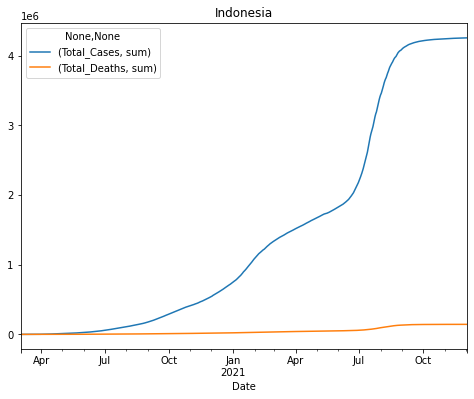

In [10]:
confirmed_cases = covid[covid['Location_ISO_Code']=='IDN'].groupby(['Date']).agg({'Total_Cases':['sum']})
fatalities = covid[covid['Location_ISO_Code']=='IDN'].groupby(['Date']).agg({'Total_Deaths':['sum']})
total = confirmed_cases.join(fatalities)

total.plot(ax=plt.gca(), title='Indonesia', figsize =(8,6))

In [11]:
covid['Location_ISO_Code'].value_counts()

ID-JK    642
IDN      642
ID-RI    641
ID-JB    640
ID-BT    637
ID-JT    635
ID-SG    633
ID-BA    632
ID-KI    629
ID-YO    627
ID-SU    626
ID-JI    625
ID-SN    624
ID-JA    623
ID-KR    623
ID-PA    621
ID-MA    620
ID-SS    620
ID-AC    617
ID-KT    617
ID-LA    617
ID-ST    617
ID-SA    617
ID-SB    617
ID-PB    616
ID-MU    616
ID-KU    614
ID-SR    614
ID-KB    614
ID-KS    613
ID-BB    613
ID-NB    612
ID-BE    611
ID-NT    603
ID-GO    591
Name: Location_ISO_Code, dtype: int64

# Covid-19 cases and fatalities in each province

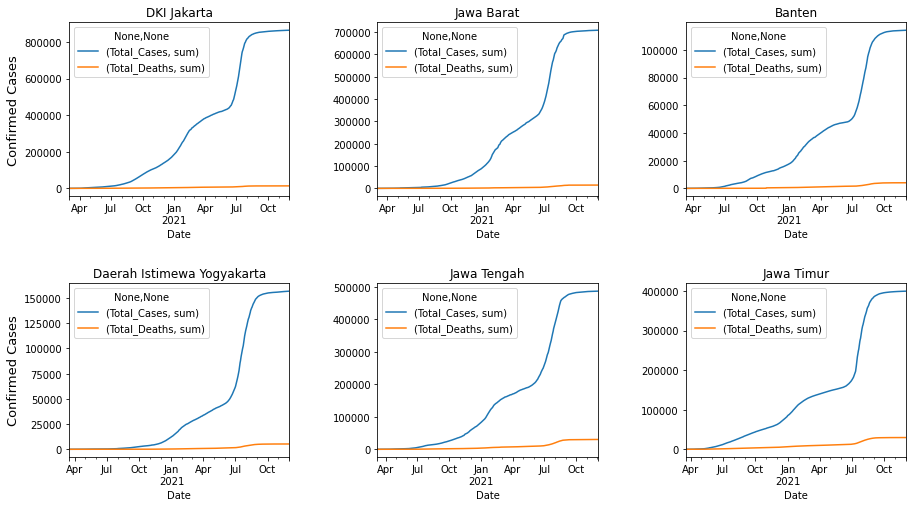

In [12]:
#Confirmed cases and fatalities in Jakarta
cc_jakarta = covid[covid['Location_ISO_Code']=='ID-JK'].groupby(['Date']).agg({'Total_Cases':['sum']})
fatalities_jakarta = covid[covid['Location_ISO_Code']=='ID-JK'].groupby(['Date']).agg({'Total_Deaths':['sum']})
jakarta = cc_jakarta.join(fatalities_jakarta)

#Confirmed cases and fatalities in Jawa Barat
cc_jabar = covid[covid['Location_ISO_Code']=='ID-JB'].groupby(['Date']).agg({'Total_Cases':['sum']})
fatalities_jabar = covid[covid['Location_ISO_Code']=='ID-JB'].groupby(['Date']).agg({'Total_Deaths':['sum']})
jabar = cc_jabar.join(fatalities_jabar)

#Confirmed cases and fatalities in Banten 
cc_banten = covid[covid['Location_ISO_Code']=='ID-BA'].groupby(['Date']).agg({'Total_Cases':['sum']})
fatalities_banten = covid[covid['Location_ISO_Code']=='ID-BA'].groupby(['Date']).agg({'Total_Deaths':['sum']})
banten = cc_banten.join(fatalities_banten)

#Confirmed cases and fatalities in Yogyakarta
cc_yogyakarta = covid[covid['Location_ISO_Code']=='ID-YO'].groupby(['Date']).agg({'Total_Cases':['sum']})
fatalities_yogyakarta = covid[covid['Location_ISO_Code']=='ID-YO'].groupby(['Date']).agg({'Total_Deaths':['sum']})
yogyakarta = cc_yogyakarta.join(fatalities_yogyakarta)

#Confirmned cases and fatalities in Jawa Tengah
cc_jateng = covid[covid['Location_ISO_Code']=='ID-JT'].groupby(['Date']).agg({'Total_Cases':['sum']})
fatalities_jateng = covid[covid['Location_ISO_Code']=='ID-JT'].groupby(['Date']).agg({'Total_Deaths':['sum']})
jateng = cc_jateng.join(fatalities_jateng)

#Confirmned cases and fatalities in Jawa Timur
cc_jatim = covid[covid['Location_ISO_Code']=='ID-JI'].groupby(['Date']).agg({'Total_Cases':['sum']})
fatalities_jatim = covid[covid['Location_ISO_Code']=='ID-JI'].groupby(['Date']).agg({'Total_Deaths':['sum']})
jatim = cc_jatim.join(fatalities_jatim)

plt.figure(figsize=(15,8))
plt.subplot(2,3,1)
plt.subplots_adjust(hspace=0.5, wspace=0.4)
jakarta.plot(ax=plt.gca(), title='DKI Jakarta')
plt.ylabel('Confirmed Cases', size=13)

plt.subplot(2,3,2)
jabar.plot(ax=plt.gca(), title='Jawa Barat')

plt.subplot(2,3,3)
banten.plot(ax=plt.gca(), title='Banten')

plt.subplot(2,3,4)
yogyakarta.plot(ax=plt.gca(), title='Daerah Istimewa Yogyakarta')
plt.ylabel('Confirmed Cases', size=13)

plt.subplot(2,3,5)
jateng.plot(ax=plt.gca(), title='Jawa Tengah')

plt.subplot(2,3,6)
jatim.plot(ax=plt.gca(), title='Jawa Timur')

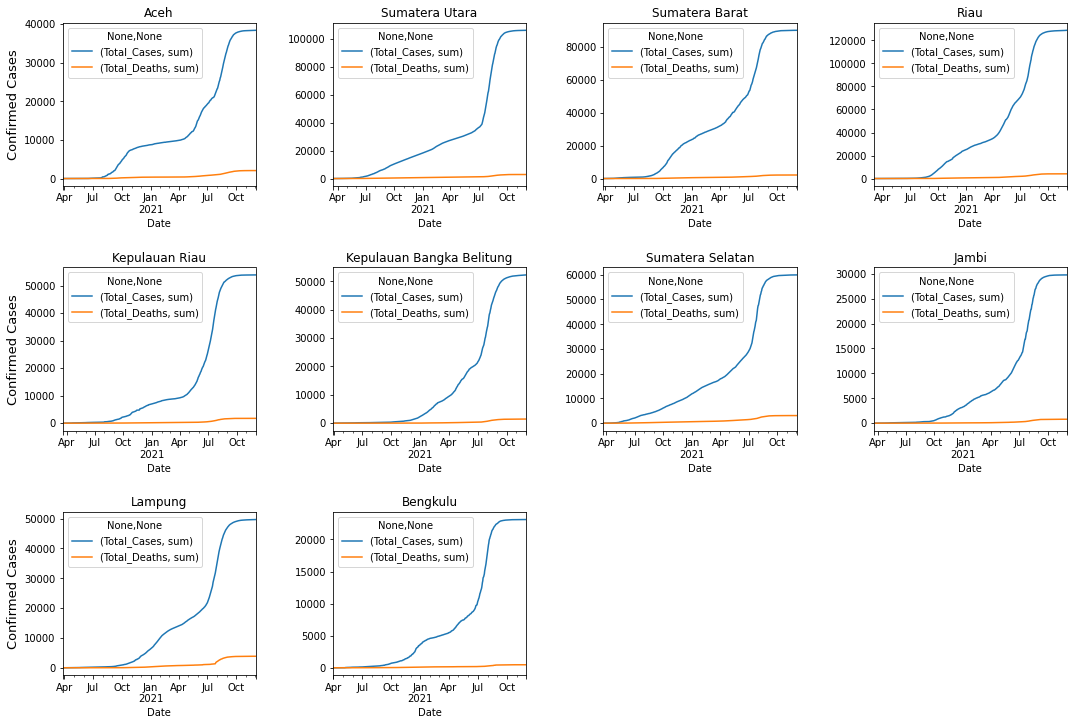

In [26]:
cc_aceh = covid[covid['Location_ISO_Code']=='ID-AC'].groupby(['Date']).agg({'Total_Cases':['sum']})
fatalities_aceh = covid[covid['Location_ISO_Code']=='ID-AC'].groupby(['Date']).agg({'Total_Deaths':['sum']})
aceh = cc_aceh.join(fatalities_aceh)

cc_sumut = covid[covid['Location_ISO_Code']=='ID-SU'].groupby(['Date']).agg({'Total_Cases':['sum']})
fatalities_sumut = covid[covid['Location_ISO_Code']=='ID-SU'].groupby(['Date']).agg({'Total_Deaths':['sum']})
sumut = cc_sumut.join(fatalities_sumut)

cc_sumbar = covid[covid['Location_ISO_Code']=='ID-SB'].groupby(['Date']).agg({'Total_Cases':['sum']})
fatalities_sumbar = covid[covid['Location_ISO_Code']=='ID-SB'].groupby(['Date']).agg({'Total_Deaths':['sum']})
sumbar = cc_sumbar.join(fatalities_sumbar)

cc_riau = covid[covid['Location_ISO_Code']=='ID-RI'].groupby(['Date']).agg({'Total_Cases':['sum']})
fatalities_riau = covid[covid['Location_ISO_Code']=='ID-RI'].groupby(['Date']).agg({'Total_Deaths':['sum']})
riau = cc_riau.join(fatalities_riau)

cc_kepri = covid[covid['Location_ISO_Code']=='ID-KR'].groupby(['Date']).agg({'Total_Cases':['sum']})
fatalities_kepri = covid[covid['Location_ISO_Code']=='ID-KR'].groupby(['Date']).agg({'Total_Deaths':['sum']})
kepri = cc_kepri.join(fatalities_kepri)

cc_babel = covid[covid['Location_ISO_Code']=='ID-BB'].groupby(['Date']).agg({'Total_Cases':['sum']})
fatalities_babel = covid[covid['Location_ISO_Code']=='ID-BB'].groupby(['Date']).agg({'Total_Deaths':['sum']})
babel = cc_babel.join(fatalities_babel)

cc_sumsel = covid[covid['Location_ISO_Code']=='ID-SS'].groupby(['Date']).agg({'Total_Cases':['sum']})
fatalities_sumsel = covid[covid['Location_ISO_Code']=='ID-SS'].groupby(['Date']).agg({'Total_Deaths':['sum']})
sumsel = cc_sumsel.join(fatalities_sumsel)

cc_jambi = covid[covid['Location_ISO_Code']=='ID-JA'].groupby(['Date']).agg({'Total_Cases':['sum']})
fatalities_jambi = covid[covid['Location_ISO_Code']=='ID-JA'].groupby(['Date']).agg({'Total_Deaths':['sum']})
jambi = cc_jambi.join(fatalities_jambi)

cc_lampung = covid[covid['Location_ISO_Code']=='ID-LA'].groupby(['Date']).agg({'Total_Cases':['sum']})
fatalities_lampung = covid[covid['Location_ISO_Code']=='ID-LA'].groupby(['Date']).agg({'Total_Deaths':['sum']})
lampung = cc_lampung.join(fatalities_lampung)

cc_bengkulu = covid[covid['Location_ISO_Code']=='ID-BE'].groupby(['Date']).agg({'Total_Cases':['sum']})
fatalities_bengkulu = covid[covid['Location_ISO_Code']=='ID-BE'].groupby(['Date']).agg({'Total_Deaths':['sum']})
bengkulu = cc_bengkulu.join(fatalities_bengkulu)

plt.figure(figsize=(18,12))
plt.subplot(3,4,1)
plt.subplots_adjust(hspace=0.5, wspace=0.4)
aceh.plot(ax=plt.gca(), title='Aceh')
plt.ylabel('Confirmed Cases', size=13)

plt.subplot(3,4,2)
sumut.plot(ax=plt.gca(), title='Sumatera Utara')

plt.subplot(3,4,3)
sumbar.plot(ax=plt.gca(), title='Sumatera Barat')

plt.subplot(3,4,4)
riau.plot(ax=plt.gca(), title='Riau')

plt.subplot(3,4,5)
kepri.plot(ax=plt.gca(), title='Kepulauan Riau')
plt.ylabel('Confirmed Cases', size=13)

plt.subplot(3,4,6)
babel.plot(ax=plt.gca(), title='Kepulauan Bangka Belitung')

plt.subplot(3,4,7)
sumsel.plot(ax=plt.gca(), title='Sumatera Selatan')

plt.subplot(3,4,8)
jambi.plot(ax=plt.gca(), title='Jambi')

plt.subplot(3,4,9)
lampung.plot(ax=plt.gca(), title='Lampung')
plt.ylabel('Confirmed Cases', size=13)

plt.subplot(3,4,10)
bengkulu.plot(ax=plt.gca(), title='Bengkulu')

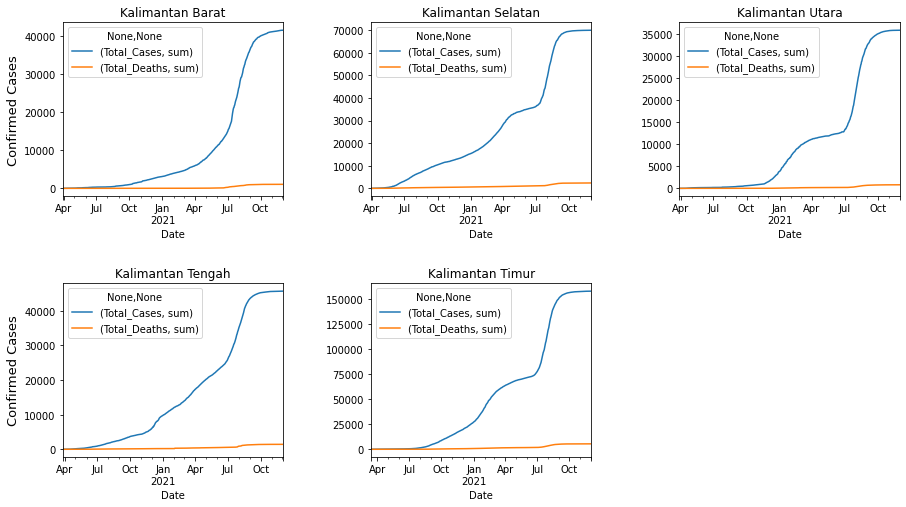

In [14]:
cc_kalbar = covid[covid['Location_ISO_Code']=='ID-KB'].groupby(['Date']).agg({'Total_Cases':['sum']})
fatalities_kalbar = covid[covid['Location_ISO_Code']=='ID-KB'].groupby(['Date']).agg({'Total_Deaths':['sum']})
kalbar = cc_kalbar.join(fatalities_kalbar)

cc_kalsel = covid[covid['Location_ISO_Code']=='ID-KS'].groupby(['Date']).agg({'Total_Cases':['sum']})
fatalities_kalsel = covid[covid['Location_ISO_Code']=='ID-KS'].groupby(['Date']).agg({'Total_Deaths':['sum']})
kalsel = cc_kalsel.join(fatalities_kalsel)

cc_kalut = covid[covid['Location_ISO_Code']=='ID-KU'].groupby(['Date']).agg({'Total_Cases':['sum']})
fatalities_kalut = covid[covid['Location_ISO_Code']=='ID-KU'].groupby(['Date']).agg({'Total_Deaths':['sum']})
kalut = cc_kalut.join(fatalities_kalut)

cc_kalteng = covid[covid['Location_ISO_Code']=='ID-KT'].groupby(['Date']).agg({'Total_Cases':['sum']})
fatalities_kalteng = covid[covid['Location_ISO_Code']=='ID-KT'].groupby(['Date']).agg({'Total_Deaths':['sum']})
kalteng = cc_kalteng.join(fatalities_kalteng)

cc_kaltim = covid[covid['Location_ISO_Code']=='ID-KI'].groupby(['Date']).agg({'Total_Cases':['sum']})
fatalities_kaltim = covid[covid['Location_ISO_Code']=='ID-KI'].groupby(['Date']).agg({'Total_Deaths':['sum']})
kaltim = cc_kaltim.join(fatalities_kaltim)

plt.figure(figsize=(15,8))
plt.subplot(2,3,1)
plt.subplots_adjust(hspace=0.5, wspace=0.4)
kalbar.plot(ax=plt.gca(), title='Kalimantan Barat')
plt.ylabel('Confirmed Cases', size=13)

plt.subplot(2,3,2)
kalsel.plot(ax=plt.gca(), title='Kalimantan Selatan')

plt.subplot(2,3,3)
kalut.plot(ax=plt.gca(), title='Kalimantan Utara')

plt.subplot(2,3,4)
kalteng.plot(ax=plt.gca(), title='Kalimantan Tengah')
plt.ylabel('Confirmed Cases', size=13)

plt.subplot(2,3,5)
kaltim.plot(ax=plt.gca(), title='Kalimantan Timur')

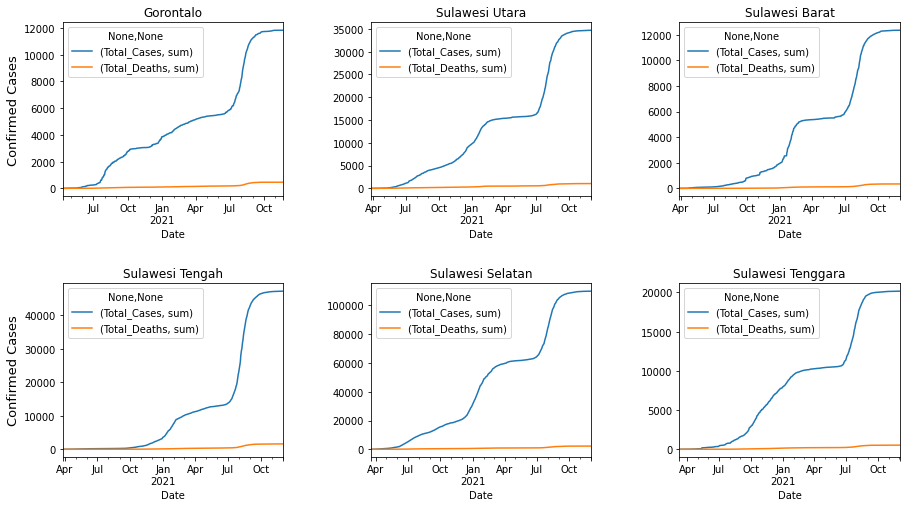

In [15]:
cc_gorontalo = covid[covid['Location_ISO_Code']=='ID-GO'].groupby(['Date']).agg({'Total_Cases':['sum']})
fatalities_gorontalo = covid[covid['Location_ISO_Code']=='ID-GO'].groupby(['Date']).agg({'Total_Deaths':['sum']})
gorontalo = cc_gorontalo.join(fatalities_gorontalo)

cc_sulut = covid[covid['Location_ISO_Code']=='ID-SA'].groupby(['Date']).agg({'Total_Cases':['sum']})
fatalities_sulut = covid[covid['Location_ISO_Code']=='ID-SA'].groupby(['Date']).agg({'Total_Deaths':['sum']})
sulut = cc_sulut.join(fatalities_sulut)

cc_sulbar = covid[covid['Location_ISO_Code']=='ID-SR'].groupby(['Date']).agg({'Total_Cases':['sum']})
fatalities_sulbar = covid[covid['Location_ISO_Code']=='ID-SR'].groupby(['Date']).agg({'Total_Deaths':['sum']})
sulbar = cc_sulbar.join(fatalities_sulbar)

cc_sulteng = covid[covid['Location_ISO_Code']=='ID-ST'].groupby(['Date']).agg({'Total_Cases':['sum']})
fatalities_sulteng = covid[covid['Location_ISO_Code']=='ID-ST'].groupby(['Date']).agg({'Total_Deaths':['sum']})
sulteng = cc_sulteng.join(fatalities_sulteng)

cc_sulsel = covid[covid['Location_ISO_Code']=='ID-SN'].groupby(['Date']).agg({'Total_Cases':['sum']})
fatalities_sulsel = covid[covid['Location_ISO_Code']=='ID-SN'].groupby(['Date']).agg({'Total_Deaths':['sum']})
sulsel = cc_sulsel.join(fatalities_sulsel)

cc_sultra = covid[covid['Location_ISO_Code']=='ID-SG'].groupby(['Date']).agg({'Total_Cases':['sum']})
fatalities_sultra = covid[covid['Location_ISO_Code']=='ID-SG'].groupby(['Date']).agg({'Total_Deaths':['sum']})
sultra = cc_sultra.join(fatalities_sultra)

plt.figure(figsize=(15,8))
plt.subplot(2,3,1)
plt.subplots_adjust(hspace=0.5, wspace=0.4)
gorontalo.plot(ax=plt.gca(), title='Gorontalo')
plt.ylabel('Confirmed Cases', size=13)

plt.subplot(2,3,2)
sulut.plot(ax=plt.gca(), title='Sulawesi Utara')

plt.subplot(2,3,3)
sulbar.plot(ax=plt.gca(), title='Sulawesi Barat')

plt.subplot(2,3,4)
sulteng.plot(ax=plt.gca(), title='Sulawesi Tengah')
plt.ylabel('Confirmed Cases', size=13)

plt.subplot(2,3,5)
sulsel.plot(ax=plt.gca(), title='Sulawesi Selatan')

plt.subplot(2,3,6)
sultra.plot(ax=plt.gca(), title='Sulawesi Tenggara')

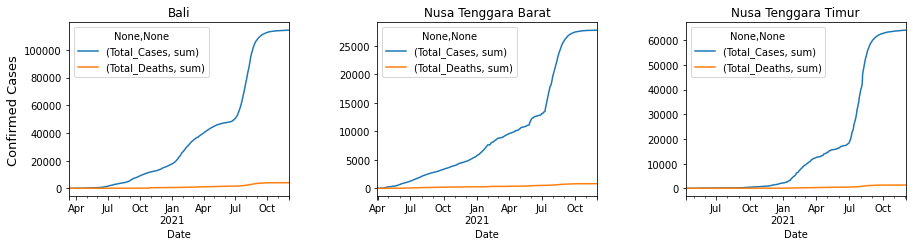

In [23]:
cc_bali = covid[covid['Location_ISO_Code']=='ID-BA'].groupby(['Date']).agg({'Total_Cases':['sum']})
fatalities_bali = covid[covid['Location_ISO_Code']=='ID-BA'].groupby(['Date']).agg({'Total_Deaths':['sum']})
bali = cc_bali.join(fatalities_bali)

cc_ntb = covid[covid['Location_ISO_Code']=='ID-NB'].groupby(['Date']).agg({'Total_Cases':['sum']})
fatalities_ntb = covid[covid['Location_ISO_Code']=='ID-NB'].groupby(['Date']).agg({'Total_Deaths':['sum']})
ntb = cc_ntb.join(fatalities_ntb)

cc_ntt = covid[covid['Location_ISO_Code']=='ID-NT'].groupby(['Date']).agg({'Total_Cases':['sum']})
fatalities_ntt = covid[covid['Location_ISO_Code']=='ID-NT'].groupby(['Date']).agg({'Total_Deaths':['sum']})
ntt = cc_ntt.join(fatalities_ntt)

plt.figure(figsize=(15,8))
plt.subplot(2,3,1)
plt.subplots_adjust(hspace=0.5, wspace=0.4)
bali.plot(ax=plt.gca(), title='Bali')
plt.ylabel('Confirmed Cases', size=13)

plt.subplot(2,3,2)
ntb.plot(ax=plt.gca(), title='Nusa Tenggara Barat')

plt.subplot(2,3,3)
ntt.plot(ax=plt.gca(), title='Nusa Tenggara Timur')

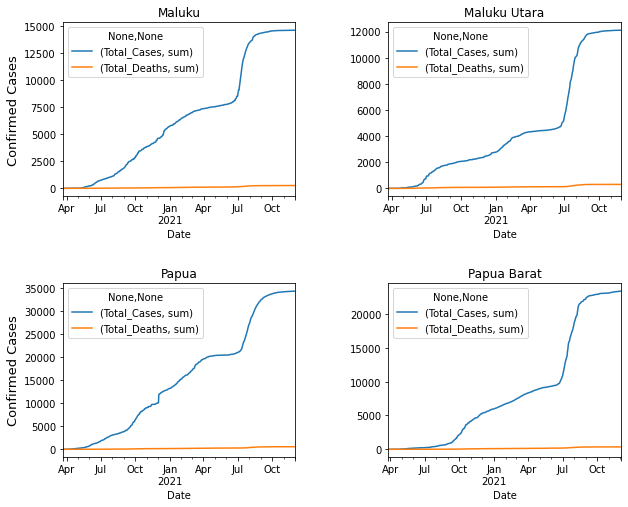

In [30]:
cc_maluku = covid[covid['Location_ISO_Code']=='ID-MA'].groupby(['Date']).agg({'Total_Cases':['sum']})
fatalities_maluku = covid[covid['Location_ISO_Code']=='ID-MA'].groupby(['Date']).agg({'Total_Deaths':['sum']})
maluku = cc_maluku.join(fatalities_maluku)

cc_malut = covid[covid['Location_ISO_Code']=='ID-MU'].groupby(['Date']).agg({'Total_Cases':['sum']})
fatalities_malut = covid[covid['Location_ISO_Code']=='ID-MU'].groupby(['Date']).agg({'Total_Deaths':['sum']})
malut = cc_malut.join(fatalities_malut)

cc_papua = covid[covid['Location_ISO_Code']=='ID-PA'].groupby(['Date']).agg({'Total_Cases':['sum']})
fatalities_papua = covid[covid['Location_ISO_Code']=='ID-PA'].groupby(['Date']).agg({'Total_Deaths':['sum']})
papua = cc_papua.join(fatalities_papua)

cc_pbarat = covid[covid['Location_ISO_Code']=='ID-PB'].groupby(['Date']).agg({'Total_Cases':['sum']})
fatalities_pbarat = covid[covid['Location_ISO_Code']=='ID-PB'].groupby(['Date']).agg({'Total_Deaths':['sum']})
pbarat = cc_pbarat.join(fatalities_pbarat)

plt.figure(figsize=(10,8))
plt.subplot(2,2,1)
plt.subplots_adjust(hspace=0.5, wspace=0.4)
maluku.plot(ax=plt.gca(), title='Maluku')
plt.ylabel('Confirmed Cases', size=13)

plt.subplot(2,2,2)
malut.plot(ax=plt.gca(), title='Maluku Utara')

plt.subplot(2,2,3)
papua.plot(ax=plt.gca(), title='Papua')
plt.ylabel('Confirmed Cases', size=13)

plt.subplot(2,2,4)
pbarat.plot(ax=plt.gca(), title='Papua Barat')
